In [9]:
!pip install tensorflow

In [11]:
import numpy as np
import pandas as pd

df = pd.read_csv("winequality-red.csv", sep=";")

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [12]:
import tensorflow as tf

# 75% of the data is selected
train_df = df.sample(frac=0.75, random_state=4)

# it drops the training data
# from the original dataframe
val_df = df.drop(train_df.index)

In [15]:
# now let's separate the targets and labels
X_train = train_df.drop('quality',axis=1)
X_val = val_df.drop('quality',axis=1)
y_train = train_df['quality']
y_val = val_df['quality']

# We'll need to pass the shape
# of features/inputs as an argument
# in our model, so let's define a variable
# to save it.
input_shape = (X_train.shape[1],)   # tuple, e.g. (11,)


input_shape

[11]

In [17]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=input_shape),
    tf.keras.layers.Dense(units=1)
])

model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12 (48.00 B)

 Trainable params: 12 (48.00 B)

 Non-trainable params: 0 (0.00 B)

In [19]:
input_shape = (X_train.shape[1],)   # single tuple, e.g. (11,)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu', input_shape=input_shape),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,993 (19.50 KB)

 Trainable params: 4,993 (19.50 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:

# adam optimizer works pretty well for
# all kinds of problems and is a good starting point
model.compile(optimizer='adam',

			# MAE error is good for
			# numerical predictions
			loss='mae')

In [21]:

losses = model.fit(X_train, y_train,

                   validation_data=(X_val, y_val),

                   # it will use 'batch_size' number
                   # of examples per example
                   batch_size=256,
                   epochs=15,  # total epoch

                   )


Epoch 1/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 2.6829 - val_loss: 1.8584
Epoch 2/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1.8733 - val_loss: 1.3055
Epoch 3/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1.2733 - val_loss: 0.9192
Epoch 4/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.8733 - val_loss: 0.7888
Epoch 5/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.7686 - val_loss: 0.7461
Epoch 6/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.7487 - val_loss: 0.7026
Epoch 7/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.7016 - val_loss: 0.6681
Epoch 8/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.6670 - val_loss: 0.6357
Epoch 9/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.6276 - val_loss: 0.6161
Epoch 10/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.6187 - val_loss: 0.6042
Epoch 11/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.6251 - val_loss: 0.5956
Epoch 12/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.6135 - val_loss: 0.5824
E

In [22]:

# this will pass the first 3 rows of features
# of our data as input to make predictions
model.predict(X_val.iloc[0:3, :])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


array([[5.049639 ],
       [4.801346 ],
       [4.4805846]], dtype=float32)

In [23]:
y_val.iloc[0:3]


,quality
0,5
9,5
12,5


<Axes: >

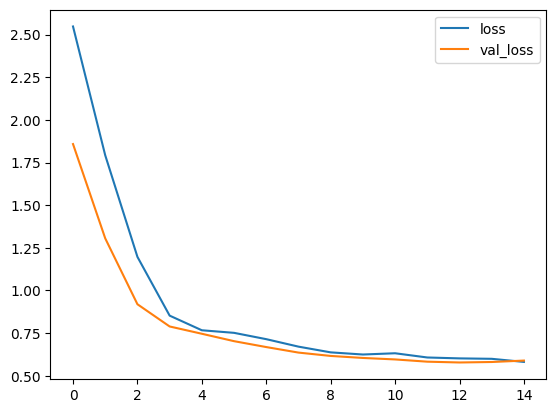

In [24]:

loss_df = pd.DataFrame(losses.history)

# history stores the loss/val
# loss in each epoch

# loss_df is a dataframe which
# contains the losses so we can
# plot it to visualize our model training
loss_df.loc[:,['loss','val_loss']].plot()